In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import os
import pickle

pd.options.display.max_columns=100
plt.style.use('ggplot')

In [3]:
path=r'C:\Users\berid\python\ChatGPT Reviews'

In [4]:
kaggle.api.dataset_download_files('ashishkumarak/chatgpt-reviews-daily-updated',path=path,unzip=True,quiet=False)

Dataset URL: https://www.kaggle.com/datasets/ashishkumarak/chatgpt-reviews-daily-updated


100%|██████████| 11.3M/11.3M [00:07<00:00, 1.69MB/s]


In [7]:
df=pd.read_csv(os.path.join(path,'chatgpt_reviews.csv'))

In [16]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d10505ee-89c6-4ed1-9297-9353d876e866,red peacock,The worst application ai,1,0,NaN,2024-08-09 19:48:23,NaN
1,1adfc188-8a18-44ac-8078-bdc31972388a,Vinay Gaur,good,5,0,1.2024.206,2024-08-09 19:45:49,1.2024.206
2,91d19610-1787-4b74-982a-4e976caee8a1,Subaira Sarkar,Love this app,5,0,1.2024.212,2024-08-09 19:45:44,1.2024.212
3,a319a2f9-c8e8-49cf-ae36-b5225c005eca,Pano Matafimo,Still The best. She's the mothership.🫶👌,5,0,NaN,2024-08-09 19:45:20,NaN
4,71fbdc7c-674d-4330-a546-e1b35e33636c,Ron Ruys,This was a great app and very accurate however...,1,0,NaN,2024-08-09 19:43:07,NaN
...,...,...,...,...,...,...,...,...
183841,462686ff-e500-413c-a6b4-2badc2e3b21d,m.santhosh Kumar,Update 2023,5,0,NaN,2023-07-27 16:26:31,NaN
183842,f10e0d48-ecb6-42db-b103-46c0046f9be9,Andrew Bourgeois,its grear,5,0,NaN,2023-09-23 16:25:18,NaN
183843,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Dern Bob,Funtastic App,5,0,NaN,2023-11-08 13:57:14,NaN
183844,abe43878-973f-4e96-a765-c4af5c7f7b20,Abdur rahman arif,hi all,5,0,NaN,2023-07-25 15:32:57,NaN


In [17]:
df.isna().mean()*100

reviewId                0.000000
userName                0.000551
content                 0.003309
score                   0.000000
thumbsUpCount           0.000000
reviewCreatedVersion    7.712712
at                      0.000000
appVersion              7.712712
dtype: float64

In [18]:
df.nunique()

reviewId                180418
userName                168868
content                 118343
score                        5
thumbsUpCount              233
reviewCreatedVersion        76
at                      179907
appVersion                  76
dtype: int64

In [19]:
df=df.drop_duplicates().reset_index(drop=True)

In [22]:
df['at']=pd.to_datetime(df['at'],errors='coerce')

In [23]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d10505ee-89c6-4ed1-9297-9353d876e866,red peacock,The worst application ai,1,0,NaN,2024-08-09 19:48:23,NaN
1,1adfc188-8a18-44ac-8078-bdc31972388a,Vinay Gaur,good,5,0,1.2024.206,2024-08-09 19:45:49,1.2024.206
2,91d19610-1787-4b74-982a-4e976caee8a1,Subaira Sarkar,Love this app,5,0,1.2024.212,2024-08-09 19:45:44,1.2024.212
3,a319a2f9-c8e8-49cf-ae36-b5225c005eca,Pano Matafimo,Still The best. She's the mothership.🫶👌,5,0,NaN,2024-08-09 19:45:20,NaN
4,71fbdc7c-674d-4330-a546-e1b35e33636c,Ron Ruys,This was a great app and very accurate however...,1,0,NaN,2024-08-09 19:43:07,NaN
...,...,...,...,...,...,...,...,...
181332,462686ff-e500-413c-a6b4-2badc2e3b21d,m.santhosh Kumar,Update 2023,5,0,NaN,2023-07-27 16:26:31,NaN
181333,f10e0d48-ecb6-42db-b103-46c0046f9be9,Andrew Bourgeois,its grear,5,0,NaN,2023-09-23 16:25:18,NaN
181334,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Dern Bob,Funtastic App,5,0,NaN,2023-11-08 13:57:14,NaN
181335,abe43878-973f-4e96-a765-c4af5c7f7b20,Abdur rahman arif,hi all,5,0,NaN,2023-07-25 15:32:57,NaN


In [24]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [50]:
def get_comment_sentiment_scores(comment):
    comment_tokenized=nltk.word_tokenize(comment)
    comment_lower=[w.lower() for w in comment_tokenized]
    comment_lemmatized=[lemmatizer.lemmatize(w) for w in comment_lower]
    comment_filtered=[w for w in comment_lemmatized if w not in stopwords]
    final_comment=' '.join(comment_filtered)
    
    score=sia.polarity_scores(final_comment)

    return score

In [52]:
scores=[]

for i, content in enumerate(df['content'],start=1):
    try:
        score=get_comment_sentiment_scores(content)
    except:
        score=None

    scores.append(score)

    if i%1000==0 or i==len(df['content']):
        print(f'Progress: {i}/{len(df['content'])}',end='\r')

In [57]:
#pickle.dump(scores,open(os.path.join(path,'sentiment_scores.pickle'),'wb'))
scores=pickle.load(open(os.path.join(path,'sentiment_scores.pickle'),'rb'))

In [58]:
compound_scores=[i['compound'] if i else None for i in scores]

In [59]:
df['Sentiment Score']=compound_scores

C:\Users\berid\AppData\Local\Temp\ipykernel_6432\2771106373.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,size=8)


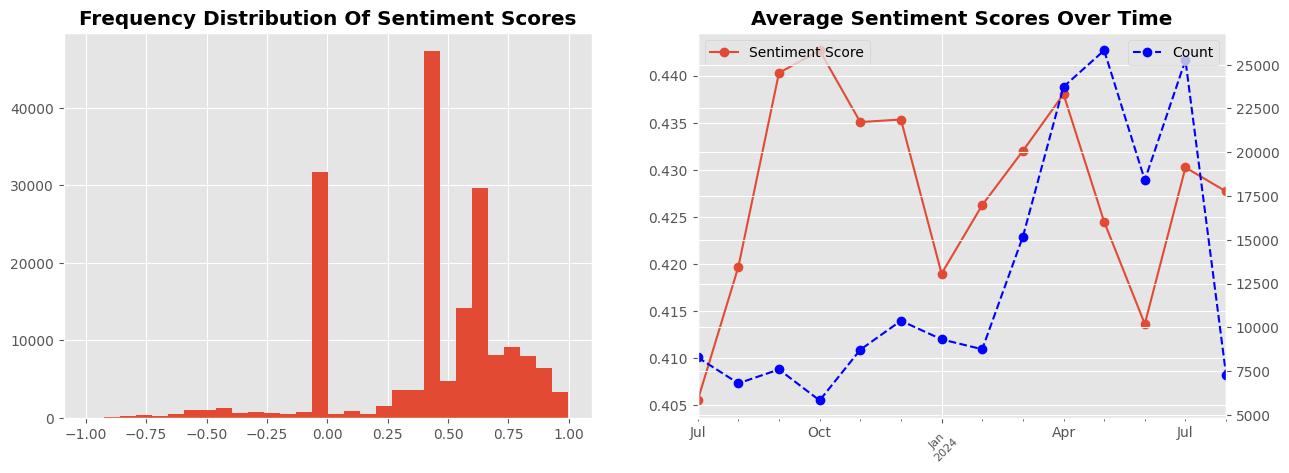

In [115]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

df['Sentiment Score'].hist(ax=ax1,bins=30)
ax1.set_title('Frequency Distribution Of Sentiment Scores',fontweight='bold')

g=df.groupby(df['at'].dt.to_period('M')).agg({'Sentiment Score':'mean','reviewId':'count'})
g.plot(ax=ax2,marker='o',y='Sentiment Score')
secondary_y=ax2.twinx()
g.plot(ax=secondary_y,marker='o',y='reviewId',color='blue',label='Count',ls='--')

ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,size=8)
ax2.set_xlabel(None)
ax2.set_title('Average Sentiment Scores Over Time',fontweight='bold')
ax2.legend(loc='upper left')
secondary_y.legend(loc='upper right')

plt.show()

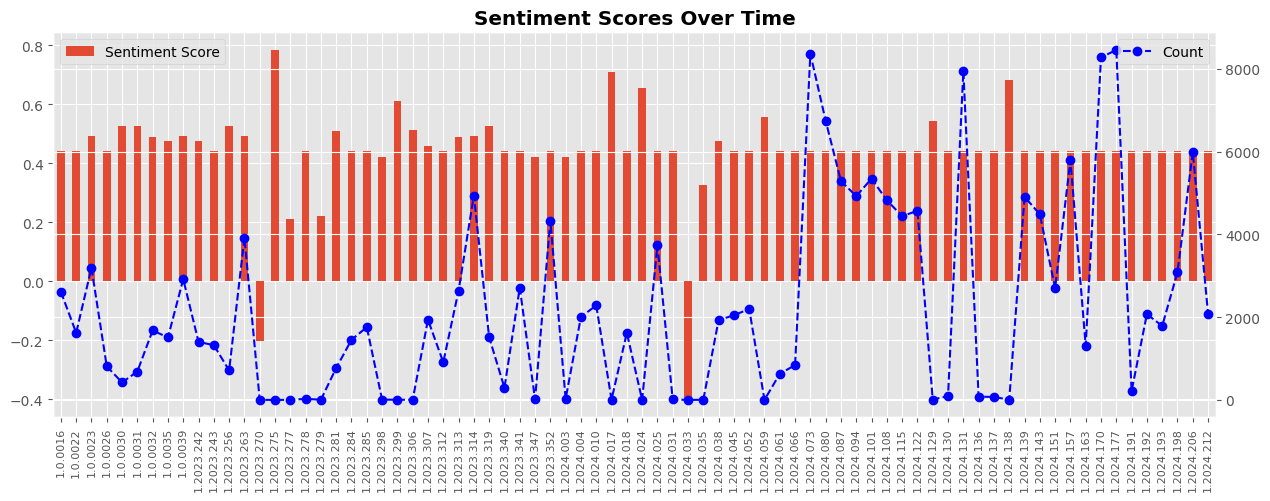

In [116]:
g=df.groupby('reviewCreatedVersion').agg({'Sentiment Score':'median','reviewId':'count'})


fig,ax=plt.subplots(figsize=(15,5))

g.plot.bar(ax=ax,y='Sentiment Score')
secondary_y=ax.twinx()
g.plot(ax=secondary_y,marker='o',y='reviewId',color='blue',label='Count',ls='--')

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=8)
ax.set_xlabel(None)
ax.set_title('Sentiment Scores Over Time',fontweight='bold')
ax.legend(loc='upper left')
secondary_y.legend(loc='upper right')

plt.show()
